In [2]:
# data
import numpy as np
import pandas as pd
# !pip install missingno
# !pip install wordcloud

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud

# nltk
import nltk

In [3]:
import pandas as pd

df_facebook = pd.read_csv('df_posts5075.csv')
df_web = pd.read_csv('qaranJobs2years.csv')
df_comments = pd.read_csv('df_Comments.csv')
df_reactions = pd.read_csv('df_reactions.csv')

In [4]:
df_facebook.head()

,id,created_time,permalink_url,full_picture,message,attachments,shares.count,reactions.data,reactions.summary.total_count,comments.data,comments.summary.total_count,shares,attachments.data
0,1.910000e+29,2024-03-31 11:40:46+00:00,https://www.facebook.com/100069752805511/posts...,https://scontent.fmgq1-2.fna.fbcdn.net/v/t39.3...,Fursado Shaqo:\nTSFP/MCHN/BSFP Registration Cl...,NaN,3.0,[],30,"[{'id': '726961929638894_324291780293386', 'cr...",5,NaN,NaN
1,1.910000e+29,2024-03-31 09:02:41+00:00,https://www.facebook.com/100069752805511/posts...,https://scontent.fmgq1-2.fna.fbcdn.net/v/t39.3...,𝟓 𝐅𝐮𝐫𝐬𝐚𝐝𝐨 𝐒𝐡𝐚𝐪𝐨 𝐀𝐡:\nJamhuuriyadda Federaalka ...,NaN,NaN,[],28,"[{'id': '726894056312348_478021441447570', 'cr...",1,NaN,NaN
2,1.910000e+29,2024-03-31 08:15:21+00:00,https://www.facebook.com/100069752805511/posts...,https://scontent.fmgq1-2.fna.fbcdn.net/v/t39.3...,Fursad Shaqo:\nDhamaan Dadwaynaha Ku Nool Deeg...,NaN,3.0,[],22,"[{'id': '726875066314247_433778902458181', 'cr...",3,NaN,NaN
3,1.910000e+29,2024-03-31 06:36:19+00:00,https://www.facebook.com/100069752805511/posts...,https://scontent.fmgq1-2.fna.fbcdn.net/v/t39.3...,4 Fursado Shaqo Ah:\nSalaam Somali Bank Waxaa ...,NaN,1.0,[],17,[],0,NaN,NaN
4,1.910000e+29,2024-03-30 13:08:50+00:00,https://www.facebook.com/100069752805511/posts...,https://scontent.fmgq1-2.fna.fbcdn.net/v/t45.1...,6 Fursado Shaqo Ah:\nHay'adda Save the Childre...,NaN,9.0,[],161,"[{'id': '726381423030278_1141881690573753', 'c...",16,NaN,NaN


In [5]:
df_web.head()

,title,company,location,posted,url
0,Somali jobs: The Federal Republic of Somalia (...,Federal Republic of Somalia,Somalia,"March 31, 2024",https://qaranjobs.com/job/somali-jobs-the-fede...
1,Somali jobs at Save the Children (6 positions),Save the Children,Somalia,"March 30, 2024",https://qaranjobs.com/job/somali-jobs-at-save-...
2,Somali jobs at UNICEF (3 Positions),United Nations Children’s Fund (UNICEF),Somalia,"March 24, 2024",https://qaranjobs.com/?post_type=job_listing&p...
3,Jobs at Somali Red Crescent Society (SRCS) (4 ...,Ururka Bisha Cas (SRCS),Somalia,"March 23, 2024",https://qaranjobs.com/?post_type=job_listing&p...
4,Finance Assistance,Amtel,Somalia,"March 20, 2024",https://qaranjobs.com/job/finance-assistance-a...


In [6]:
df_facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5075 entries, 0 to 5074
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             5075 non-null   float64
 1   created_time                   5075 non-null   object 
 2   permalink_url                  5075 non-null   object 
 3   full_picture                   5074 non-null   object 
 4   message                        5075 non-null   object 
 5   attachments                    0 non-null      float64
 6   shares.count                   2987 non-null   float64
 7   reactions.data                 5075 non-null   object 
 8   reactions.summary.total_count  5075 non-null   int64  
 9   comments.data                  5075 non-null   object 
 10  comments.summary.total_count   5075 non-null   int64  
 11  shares                         0 non-null      float64
 12  attachments.data               1 non-null      o

In [7]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     5760 non-null   object
 1   company   5760 non-null   object
 2   location  5760 non-null   object
 3   posted    5760 non-null   object
 4   url       5760 non-null   object
dtypes: object(5)
memory usage: 225.1+ KB


In [8]:
import re
# First, ensure that the URL column is named the same in both DataFrames and is properly formatted
df_facebook['url'] = df_facebook['message'].apply(lambda x: re.search(r'https://qaranjobs.com/job/[^\s]+', x).group(0) if re.search(r'https://qaranjobs.com/job/[^\s]+', x) else None)

# Now merge the two DataFrames based on the 'url' column
# You can choose how to handle non-matching rows using the 'how' parameter, for example 'inner' to get only matches
combined_df = pd.merge(df_web, df_facebook, on='url', how='inner')



In [9]:
combined_df.head()

,title,company,location,posted,url,id,created_time,permalink_url,full_picture,message,attachments,shares.count,reactions.data,reactions.summary.total_count,comments.data,comments.summary.total_count,shares,attachments.data
0,Somali jobs: The Federal Republic of Somalia (...,Federal Republic of Somalia,Somalia,"March 31, 2024",https://qaranjobs.com/job/somali-jobs-the-fede...,1.910000e+29,2024-03-31 09:02:41+00:00,https://www.facebook.com/100069752805511/posts...,https://scontent.fmgq1-2.fna.fbcdn.net/v/t39.3...,𝟓 𝐅𝐮𝐫𝐬𝐚𝐝𝐨 𝐒𝐡𝐚𝐪𝐨 𝐀𝐡:\nJamhuuriyadda Federaalka ...,NaN,NaN,[],28,"[{'id': '726894056312348_478021441447570', 'cr...",1,NaN,NaN
1,Somali jobs at Save the Children (6 positions),Save the Children,Somalia,"March 30, 2024",https://qaranjobs.com/job/somali-jobs-at-save-...,1.910000e+29,2024-03-30 13:08:50+00:00,https://www.facebook.com/100069752805511/posts...,https://scontent.fmgq1-2.fna.fbcdn.net/v/t45.1...,6 Fursado Shaqo Ah:\nHay'adda Save the Childre...,NaN,9.0,[],161,"[{'id': '726381423030278_1141881690573753', 'c...",16,NaN,NaN
2,Finance Assistance,Amtel,Somalia,"March 20, 2024",https://qaranjobs.com/job/finance-assistance-a...,1.910000e+29,2024-03-23 13:16:28+00:00,https://www.facebook.com/100069752805511/posts...,https://scontent.fmgq1-2.fna.fbcdn.net/v/t45.1...,2 Fursado Shaqo Ah:\nShirkadda Isgaarsiinta AM...,NaN,5.0,[],59,"[{'id': '722197130115374_435977928887881', 'cr...",14,NaN,NaN
3,Finance Assistance,Amtel,Somalia,"March 20, 2024",https://qaranjobs.com/job/finance-assistance-a...,1.910000e+29,2024-03-21 19:15:36+00:00,https://www.facebook.com/100069752805511/posts...,https://scontent.fmgq1-2.fna.fbcdn.net/v/t39.3...,"Fursad Shaqo:\n\nFinance Assistant, Mogadishu ...",NaN,NaN,[],6,"[{'id': '721158743552546_332315616038507', 'cr...",2,NaN,NaN
4,"Financial Management Specialist, Baidoa, Somalia","Southwest State of Somalia, Municipality of Ba...","Baidoa, Somalia","March 31, 2024",https://qaranjobs.com/job/financial-management...,1.910000e+29,2024-03-31 08:15:21+00:00,https://www.facebook.com/100069752805511/posts...,https://scontent.fmgq1-2.fna.fbcdn.net/v/t39.3...,Fursad Shaqo:\nDhamaan Dadwaynaha Ku Nool Deeg...,NaN,3.0,[],22,"[{'id': '726875066314247_433778902458181', 'cr...",3,NaN,NaN


In [10]:
# Remain only the necessary columns
selected_columns = ['title', 'company', 'location', 'posted', 'url', 'created_time',
                    'message', 'shares.count', 'reactions.summary.total_count',
                    'comments.summary.total_count']

# Create a new DataFrame with selected columns
df_final = combined_df[selected_columns]

In [11]:
df_final.head()

,title,company,location,posted,url,created_time,message,shares.count,reactions.summary.total_count,comments.summary.total_count
0,Somali jobs: The Federal Republic of Somalia (...,Federal Republic of Somalia,Somalia,"March 31, 2024",https://qaranjobs.com/job/somali-jobs-the-fede...,2024-03-31 09:02:41+00:00,𝟓 𝐅𝐮𝐫𝐬𝐚𝐝𝐨 𝐒𝐡𝐚𝐪𝐨 𝐀𝐡:\nJamhuuriyadda Federaalka ...,NaN,28,1
1,Somali jobs at Save the Children (6 positions),Save the Children,Somalia,"March 30, 2024",https://qaranjobs.com/job/somali-jobs-at-save-...,2024-03-30 13:08:50+00:00,6 Fursado Shaqo Ah:\nHay'adda Save the Childre...,9.0,161,16
2,Finance Assistance,Amtel,Somalia,"March 20, 2024",https://qaranjobs.com/job/finance-assistance-a...,2024-03-23 13:16:28+00:00,2 Fursado Shaqo Ah:\nShirkadda Isgaarsiinta AM...,5.0,59,14
3,Finance Assistance,Amtel,Somalia,"March 20, 2024",https://qaranjobs.com/job/finance-assistance-a...,2024-03-21 19:15:36+00:00,"Fursad Shaqo:\n\nFinance Assistant, Mogadishu ...",NaN,6,2
4,"Financial Management Specialist, Baidoa, Somalia","Southwest State of Somalia, Municipality of Ba...","Baidoa, Somalia","March 31, 2024",https://qaranjobs.com/job/financial-management...,2024-03-31 08:15:21+00:00,Fursad Shaqo:\nDhamaan Dadwaynaha Ku Nool Deeg...,3.0,22,3


In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   title                          2920 non-null   object 
 1   company                        2920 non-null   object 
 2   location                       2920 non-null   object 
 3   posted                         2920 non-null   object 
 4   url                            2920 non-null   object 
 5   created_time                   2920 non-null   object 
 6   message                        2920 non-null   object 
 7   shares.count                   2212 non-null   float64
 8   reactions.summary.total_count  2920 non-null   int64  
 9   comments.summary.total_count   2920 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 250.9+ KB


In [13]:
# Rename the columns
df_final.rename(columns={
    'title': 'Title',
    'company': 'Company',
    'location': 'Location',
    'posted': 'Posted',
    'url': 'Url',
    'created_time': 'Created_time',
    'message': 'Facebook_Post',
    'shares.count': 'Shares_Count',
    'reactions.summary.total_count': 'Reactions_Count',
    'comments.summary.total_count': 'Comments_Count'
}, inplace=True)

In [14]:
df_final.head()

,Title,Company,Location,Posted,Url,Created_time,Facebook_Post,Shares_Count,Reactions_Count,Comments_Count
0,Somali jobs: The Federal Republic of Somalia (...,Federal Republic of Somalia,Somalia,"March 31, 2024",https://qaranjobs.com/job/somali-jobs-the-fede...,2024-03-31 09:02:41+00:00,𝟓 𝐅𝐮𝐫𝐬𝐚𝐝𝐨 𝐒𝐡𝐚𝐪𝐨 𝐀𝐡:\nJamhuuriyadda Federaalka ...,NaN,28,1
1,Somali jobs at Save the Children (6 positions),Save the Children,Somalia,"March 30, 2024",https://qaranjobs.com/job/somali-jobs-at-save-...,2024-03-30 13:08:50+00:00,6 Fursado Shaqo Ah:\nHay'adda Save the Childre...,9.0,161,16
2,Finance Assistance,Amtel,Somalia,"March 20, 2024",https://qaranjobs.com/job/finance-assistance-a...,2024-03-23 13:16:28+00:00,2 Fursado Shaqo Ah:\nShirkadda Isgaarsiinta AM...,5.0,59,14
3,Finance Assistance,Amtel,Somalia,"March 20, 2024",https://qaranjobs.com/job/finance-assistance-a...,2024-03-21 19:15:36+00:00,"Fursad Shaqo:\n\nFinance Assistant, Mogadishu ...",NaN,6,2
4,"Financial Management Specialist, Baidoa, Somalia","Southwest State of Somalia, Municipality of Ba...","Baidoa, Somalia","March 31, 2024",https://qaranjobs.com/job/financial-management...,2024-03-31 08:15:21+00:00,Fursad Shaqo:\nDhamaan Dadwaynaha Ku Nool Deeg...,3.0,22,3


In [15]:
# Fill NaN values with 0 for engagement metrics
df_final['Shares_Count'].fillna(0, inplace=True)
df_final['Reactions_Count'].fillna(0, inplace=True)
df_final['Comments_Count'].fillna(0, inplace=True)


In [16]:
# Assuming your DataFrame is named df_combined
# Calculate average shares, reactions, and comments
average_shares = df_final['Shares_Count'].mean()
average_reactions = df_final['Reactions_Count'].mean()
average_comments = df_final['Comments_Count'].mean()

print(f'Average Shares: {average_shares}')
print(f'Average Reactions: {average_reactions}')
print(f'Average Comments: {average_comments}')


Average Shares: 2.263013698630137
Average Reactions: 15.43972602739726
Average Comments: 0.9537671232876712


In [17]:
# Assuming your DataFrame is named df_combined
# Calculate average shares, reactions, and comments
sum_shares = df_final['Shares_Count'].sum()
sum_reactions = df_final['Reactions_Count'].sum()
sum_comments = df_final['Comments_Count'].sum()

print(f'Total Shares: {sum_shares}')
print(f'Total Reactions: {sum_reactions}')
print(f'Total Comments: {sum_comments}')


Total Shares: 6608.0
Total Reactions: 45084
Total Comments: 2785


In [18]:
df_final.head()

,Title,Company,Location,Posted,Url,Created_time,Facebook_Post,Shares_Count,Reactions_Count,Comments_Count
0,Somali jobs: The Federal Republic of Somalia (...,Federal Republic of Somalia,Somalia,"March 31, 2024",https://qaranjobs.com/job/somali-jobs-the-fede...,2024-03-31 09:02:41+00:00,𝟓 𝐅𝐮𝐫𝐬𝐚𝐝𝐨 𝐒𝐡𝐚𝐪𝐨 𝐀𝐡:\nJamhuuriyadda Federaalka ...,0.0,28,1
1,Somali jobs at Save the Children (6 positions),Save the Children,Somalia,"March 30, 2024",https://qaranjobs.com/job/somali-jobs-at-save-...,2024-03-30 13:08:50+00:00,6 Fursado Shaqo Ah:\nHay'adda Save the Childre...,9.0,161,16
2,Finance Assistance,Amtel,Somalia,"March 20, 2024",https://qaranjobs.com/job/finance-assistance-a...,2024-03-23 13:16:28+00:00,2 Fursado Shaqo Ah:\nShirkadda Isgaarsiinta AM...,5.0,59,14
3,Finance Assistance,Amtel,Somalia,"March 20, 2024",https://qaranjobs.com/job/finance-assistance-a...,2024-03-21 19:15:36+00:00,"Fursad Shaqo:\n\nFinance Assistant, Mogadishu ...",0.0,6,2
4,"Financial Management Specialist, Baidoa, Somalia","Southwest State of Somalia, Municipality of Ba...","Baidoa, Somalia","March 31, 2024",https://qaranjobs.com/job/financial-management...,2024-03-31 08:15:21+00:00,Fursad Shaqo:\nDhamaan Dadwaynaha Ku Nool Deeg...,3.0,22,3


In [19]:
duplicate_rows = df_final[df_final.duplicated(['Url'])]

duplicate_rows.count()

Title              155
Company            155
Location           155
Posted             155
Url                155
Created_time       155
Facebook_Post      155
Shares_Count       155
Reactions_Count    155
Comments_Count     155
dtype: int64

In [20]:
duplicate_rows.head()

,Title,Company,Location,Posted,Url,Created_time,Facebook_Post,Shares_Count,Reactions_Count,Comments_Count
3,Finance Assistance,Amtel,Somalia,"March 20, 2024",https://qaranjobs.com/job/finance-assistance-a...,2024-03-21 19:15:36+00:00,"Fursad Shaqo:\n\nFinance Assistant, Mogadishu ...",0.0,6,2
31,Fursado Shaqo Oo Ka Banaan Salaam Somali Bank,Salaam Somali Bank,Somalia,"March 25, 2024",https://qaranjobs.com/job/fursado-shaqo-oo-ka-...,2024-03-26 06:24:05+00:00,Fursado Shaqo:\nSalaam Somali Bank Waxaa Ka Ba...,5.0,35,0
38,Information Management Officer (Child Protecti...,United Nations Children’s Fund (UNICEF),"Mogadishu, Somalia","March 25, 2024",https://qaranjobs.com/job/information-manageme...,2024-03-25 05:19:14+00:00,Fursad Shaqo:\nInformation Management Officer ...,3.0,8,0
40,Curriculum Development Technical Advisor-Somal...,International Organization for Migration (IOM),"Mogadishu, Somalia","March 25, 2024",https://qaranjobs.com/job/curriculum-developme...,2024-03-25 05:17:16+00:00,Fursad Shaqo:\nCurriculum Development Technica...,2.0,6,0
43,Graphic Designer,Huda Organics,Hargesia,"March 25, 2024",https://qaranjobs.com/job/graphic-designer-2/,2024-03-25 04:01:11+00:00,"Fursad Shaqo:\nGraphic Designer, Hargesia\nhtt...",0.0,5,0


In [21]:
# Assuming your DataFrame is named df_final
selected_columns = ['Title', 'Company', 'Location', 'Posted', 'Url']

# Check for duplicates based on the selected columns
total_duplicates = df_final.duplicated(subset=selected_columns).sum()

print(f"Total number of duplicate rows based on selected columns: {total_duplicates}")


Total number of duplicate rows based on selected columns: 155


In [22]:
# Drop dublicates from df_final
df_final.drop_duplicates(subset=selected_columns, inplace=True)

In [23]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2765 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            2765 non-null   object 
 1   Company          2765 non-null   object 
 2   Location         2765 non-null   object 
 3   Posted           2765 non-null   object 
 4   Url              2765 non-null   object 
 5   Created_time     2765 non-null   object 
 6   Facebook_Post    2765 non-null   object 
 7   Shares_Count     2765 non-null   float64
 8   Reactions_Count  2765 non-null   int64  
 9   Comments_Count   2765 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 237.6+ KB


In [24]:
df_final.head()

,Title,Company,Location,Posted,Url,Created_time,Facebook_Post,Shares_Count,Reactions_Count,Comments_Count
0,Somali jobs: The Federal Republic of Somalia (...,Federal Republic of Somalia,Somalia,"March 31, 2024",https://qaranjobs.com/job/somali-jobs-the-fede...,2024-03-31 09:02:41+00:00,𝟓 𝐅𝐮𝐫𝐬𝐚𝐝𝐨 𝐒𝐡𝐚𝐪𝐨 𝐀𝐡:\nJamhuuriyadda Federaalka ...,0.0,28,1
1,Somali jobs at Save the Children (6 positions),Save the Children,Somalia,"March 30, 2024",https://qaranjobs.com/job/somali-jobs-at-save-...,2024-03-30 13:08:50+00:00,6 Fursado Shaqo Ah:\nHay'adda Save the Childre...,9.0,161,16
2,Finance Assistance,Amtel,Somalia,"March 20, 2024",https://qaranjobs.com/job/finance-assistance-a...,2024-03-23 13:16:28+00:00,2 Fursado Shaqo Ah:\nShirkadda Isgaarsiinta AM...,5.0,59,14
4,"Financial Management Specialist, Baidoa, Somalia","Southwest State of Somalia, Municipality of Ba...","Baidoa, Somalia","March 31, 2024",https://qaranjobs.com/job/financial-management...,2024-03-31 08:15:21+00:00,Fursad Shaqo:\nDhamaan Dadwaynaha Ku Nool Deeg...,3.0,22,3
5,"CHIEF SECURITY OFFICER, Mogadishu, Somalia",United Nations Support Office in Somalia (UNSOS),"Mogadishu, Somalia","March 30, 2024",https://qaranjobs.com/job/chief-security-offic...,2024-03-30 12:08:34+00:00,"Fursad Shaqo:\nCHIEF SECURITY OFFICER, Mogadis...",0.0,0,0


In [25]:
df_final.tail()

,Title,Company,Location,Posted,Url,Created_time,Facebook_Post,Shares_Count,Reactions_Count,Comments_Count
2915,Community Health Worker (4 Positions),GREDO,"Bardhere, Luuq - Somalia","October 30, 2022",https://qaranjobs.com/job/community-health-wor...,2022-10-30 03:49:07+00:00,Community Health Worker (4 Positions) – Bardhe...,3.0,2,0
2916,Dispenser/Storekeeper (4 Positions),GREDO,"Bardhere, Luuq - Somalia","October 30, 2022",https://qaranjobs.com/job/dispenser-storekeepe...,2022-10-30 03:48:18+00:00,Dispenser/Storekeeper (4 Positions) – Bardhere...,3.0,0,0
2917,Qualified Midwife (6 positions),GREDO,"Bardhere and Luuq, Somalia","October 30, 2022",https://qaranjobs.com/job/qualified-midwife-6-...,2022-10-30 03:47:15+00:00,Qualified Midwife (6 positions) – Bardhere and...,3.0,0,0
2918,Community Mobilizer (4 Positions),GREDO,"Bardhere and Luuq, Somalia","October 30, 2022",https://qaranjobs.com/job/community-mobilizer-...,2022-10-30 03:46:28+00:00,Community Mobilizer (4 Positions) – Bardhere a...,4.0,2,0
2919,Nutrition Supervisor (2 Position),GREDO,"Bardhere and Luuq, Somalia","October 30, 2022",https://qaranjobs.com/job/nutrition-supervisor...,2022-10-30 03:45:28+00:00,Nutrition Supervisor (2 Position) – Bardhere a...,3.0,0,0


In [26]:
from fuzzywuzzy import process

# Assume df_final is your actual DataFrame and it has a 'Company' column
# Get a list of unique company names to reduce comparison redundancy
unique_companies = df_final['Company'].unique()

# Define a threshold for considering names as the same company
similarity_threshold = 85

# Function to get the best match for a company name
def get_standardized_name(name, choices, threshold):
    best_match, score = process.extractOne(name, choices, score_cutoff=threshold)
    return best_match if best_match else name

# Map each company to its standardized form based on the highest similarity
standardized_names = {company: get_standardized_name(company, unique_companies, similarity_threshold) for company in unique_companies}

# Map the standardized names back to the DataFrame
df_final['Company'].apply(lambda x: standardized_names[x])

# Now df_final will have a new column 'Standardized Company' with the standardized names
print(df_final)


c:\Users\Abdiqani\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


                                                  Title  \
0     Somali jobs: The Federal Republic of Somalia (...   
1        Somali jobs at Save the Children (6 positions)   
2                                   Finance Assistance    
4      Financial Management Specialist, Baidoa, Somalia   
5            CHIEF SECURITY OFFICER, Mogadishu, Somalia   
...                                                 ...   
2915              Community Health Worker (4 Positions)   
2916                Dispenser/Storekeeper (4 Positions)   
2917                    Qualified Midwife (6 positions)   
2918                  Community Mobilizer (4 Positions)   
2919                  Nutrition Supervisor (2 Position)   

                                                Company  \
0                          Federal Republic of Somalia    
1                                    Save the Children    
2                                                Amtel    
4     Southwest State of Somalia, Municipality of Ba...

In [27]:
# Remove parentheses and any text inside them
df_final['Company'] = df_final['Company'].str.replace(r'\s*\([^)]*\)', '', regex=True)

# Display the DataFrame to see the changes
#print(df_final)

In [28]:
df_final['Company'] = df_final['Company'].str.replace(r"[’‘]", "'", regex=True)


# Now you can perform the value counts to see the aggregated number for each company
company_counts = df_final['Company'].value_counts()

# Display the corrected company counts
#print(company_counts)

In [29]:
top10_job_title = df_final['Title'].value_counts()[:10]
# print(top10_job_title)
fig = px.bar(y=top10_job_title.values, 
             x=top10_job_title.index, 
             color = top10_job_title.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=top10_job_title.values,
             title= 'Top 10 Job Titles',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Job Titles",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [30]:
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=1200, 
               height=600, 
               max_words=50,
               colormap= colormap,
               max_font_size = 100,
               random_state=88, 
               background_color=color_background).generate_from_frequencies(data)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()


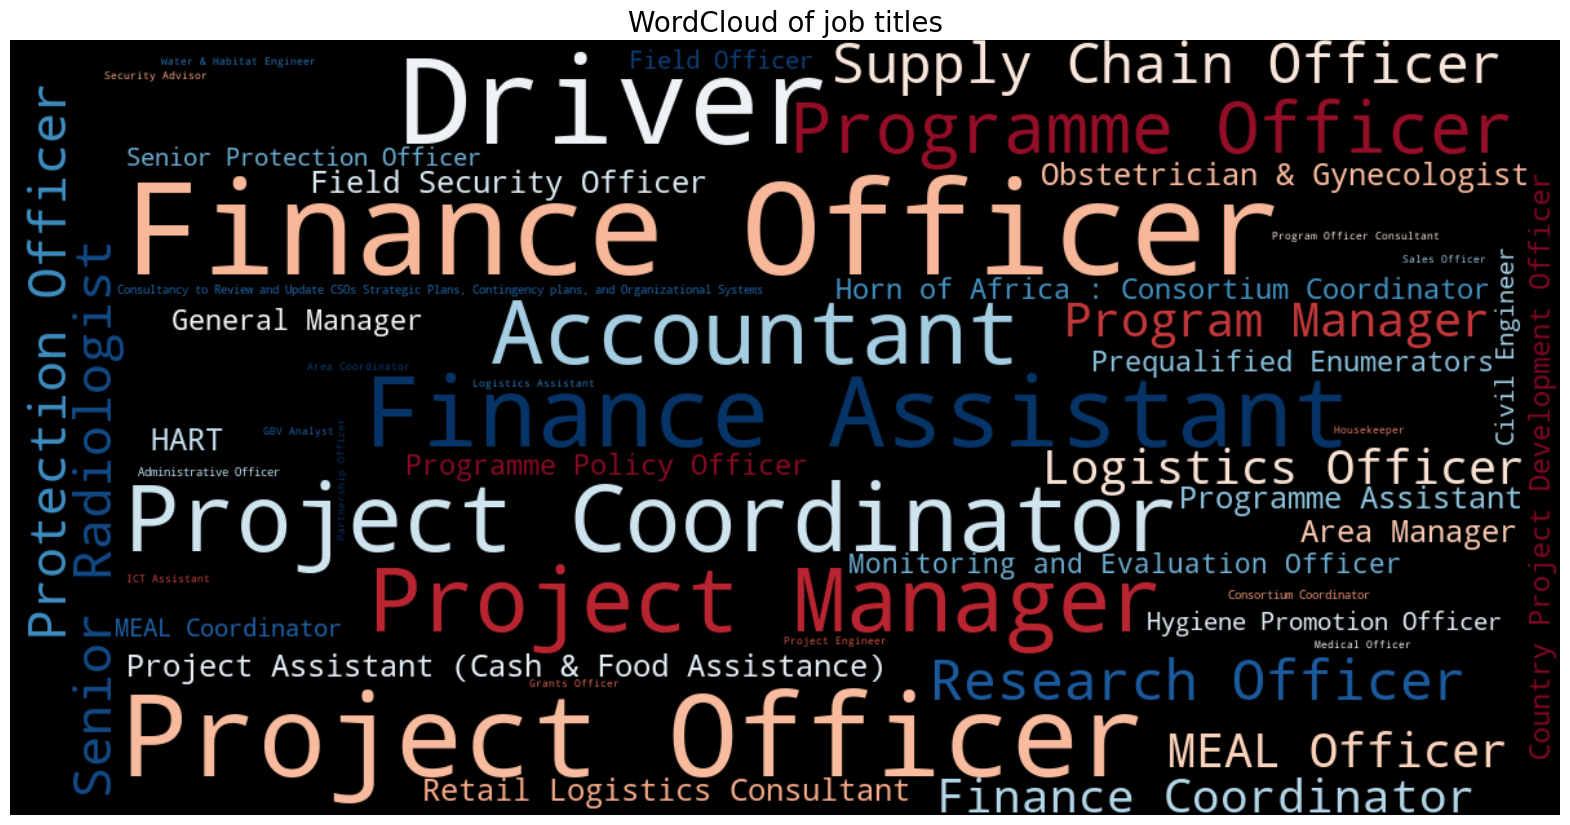

In [31]:
freq_df = Freq_df(df_final['Title'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data ,'black','RdBu', 'WordCloud of job titles')

In [32]:
top10_job_title = df_final['Company'].value_counts()[:10]
# print(top10_job_title)
fig = px.bar(y=top10_job_title.values, 
             x=top10_job_title.index, 
             color = top10_job_title.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=top10_job_title.values,
             title= 'Top 10 Companies',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Company",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

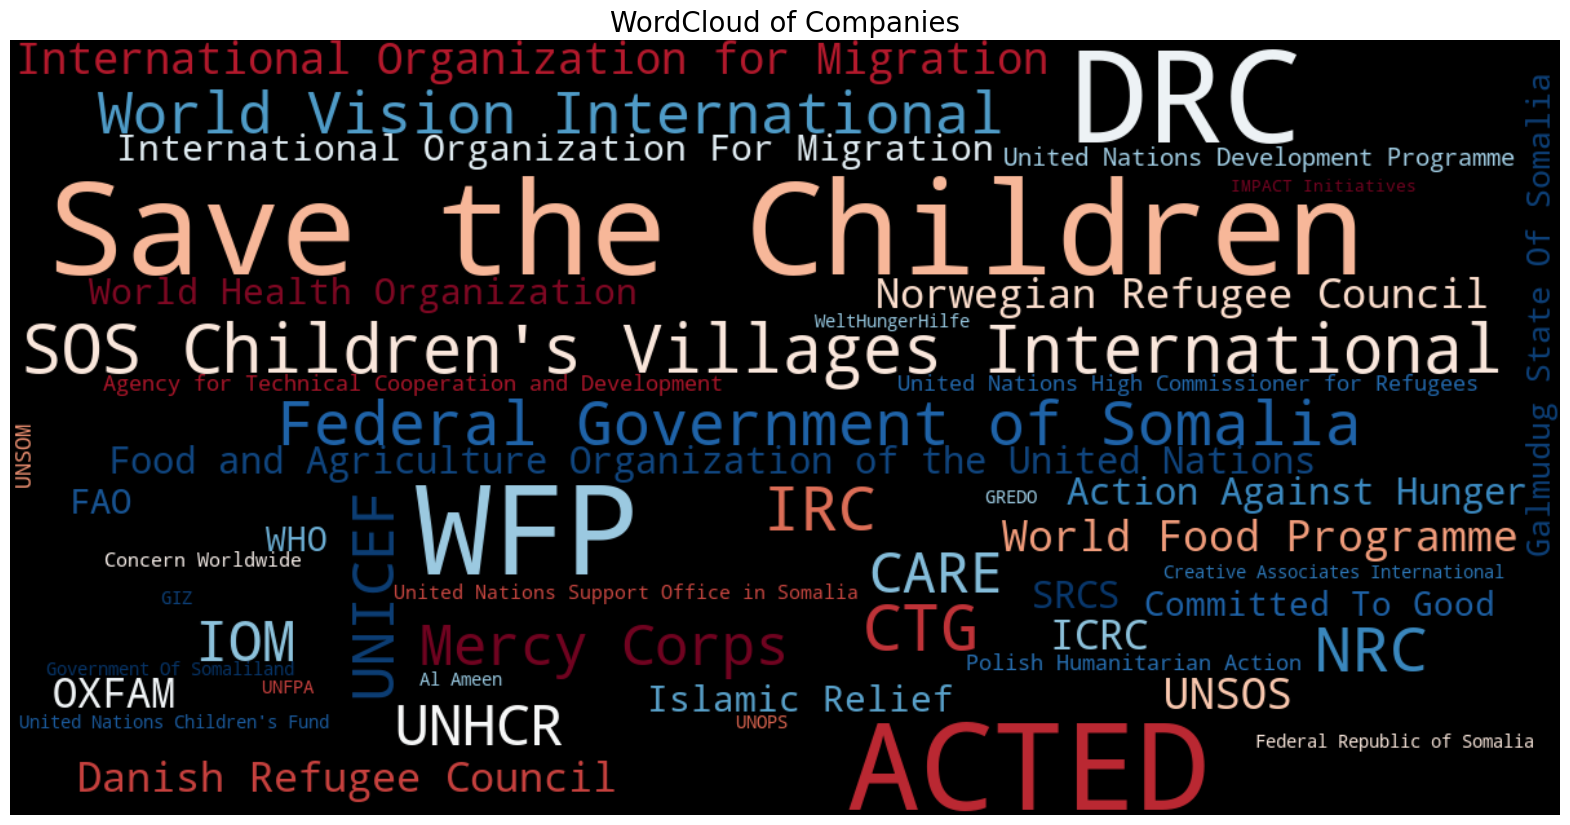

In [33]:
freq_df = Freq_df(df_final['Company'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data ,'black','RdBu', 'WordCloud of Companies')

In [34]:
stem_keywords = [
    "Software Developer",
    "Data Scientist",
    "Artificial Intelligence Engineer",
    "Machine Learning Engineer",
    "Robotics Engineer",
    "Cybersecurity Analyst",
    "Network Administrator",
    "Database Administrator",
    "Web Developer",
    "Mobile App Developer",
    "DevOps Engineer",
    "Systems Administrator",
    "Cloud Architect",
    "IT Project Manager",
    "Computer Systems Analyst",
    "Network Architect",
    "UI/UX Designer",
    "Computer Programmer",
    "Game Developer",
    "Virtual Reality Developer",
    "Augmented Reality Developer",
    "Digital Forensics Analyst",
    "Computer Hardware Engineer",
    "Embedded Systems Engineer",
    "Electronics Engineer",
    "Civil Engineer",
    "Mechanical Engineer",
    "Electrical Engineer",
    "Chemical Engineer",
    "Biomedical Engineer",
    "Aerospace Engineer",
    "Automotive Engineer",
    "Nuclear Engineer",
    "Marine Engineer",
    "Petroleum Engineer",
    "Geotechnical Engineer",
    "Structural Engineer",
    "Materials Engineer",
    "Process Engineer",
    "Industrial Engineer",
    "Operations Research Analyst",
    "Data Analyst",
    "Statistician",
    "Mathematician",
    "Actuary",
    "Cryptographer",
    "Quantitative Analyst",
    "Environmental Scientist",
    "Geoscientist",
    "Ecologist",
    "Meteorologist",
    "Oceanographer",
    "Biologist",
    "Microbiologist",
    "Biochemist",
    "Geneticist",
    "Biotechnologist",
    "Pharmaceutical Researcher",
    "Clinical Research Associate",
    "Medical Scientist",
    "Forensic Scientist",
    "Food Scientist",
    "Physicist",
    "Astrophysicist",
    "Astronomer",
    "Cosmologist",
    "Chemist",
    "Analytical Chemist",
    "Materials Scientist",
    "Science Educator",
    "STEM Consultant",
    "STEM Project Manager",
    "STEM Policy Analyst",
    "STEM Writer",
    "STEM Illustrator",
    "STEM Outreach Coordinator",
    "Senior Medical Technical Advisor",
    "Senior Health emergency preparedness and Response Advisor",
    "Health, Safety, Social and Environmental (HSSE) Officer",
    "UN Clinic Physician",
    "Project Engineer",
    "Statistics Expert",
    "CMAM Nurse"
    'IYCF Nurse',
    'ICT Support Assistant',
    'Wash Engineering',
    'WASH Project Manager',
    'IT Service Delivery Management Officer'
    'Engineer',
    'ICT Officer',
    'Information Technology Assistant (IT)',
    'ICT SPECIALIST',
    'REACH Geographic Information System (GIS) Officer',
    'Radiographer',
    'IT Coordinator',
    'Information Technology Assistant (IT)',
    'WASH Project Manager', 
    'Senior Medical Technical Advisor',
    "Software Engineer",
    "Data Scientist",
    "Data",
    "Mechanical Engineer",
    "Civil Engineer",
    "Electrical Engineer",
    "Chemical Engineer",
    "Biomedical Engineer",
    "Systems Engineer",
    "Industrial Engineer",
    "Network Engineer",
    "Aerospace Engineer",
    "Environmental Engineer",
    "Computer Scientist",
    "IT Manager",
    "Web Developer",
    "Database Administrator",
    "Information Security Analyst",
    "AI Engineer",
    "Machine Learning Engineer",
    "Robotics Engineer",
    "Applications Developer",
    "Mobile App Developer",
    "Systems Analyst",
    "Network Architect",
    "Cloud Solutions Architect",
    "Biochemist",
    "Biologist",
    "Physicist",
    "Geologist",
    "Meteorologist",
    "Oceanographer",
    "Statistician",
    "Mathematician",
    "Quality Assurance Analyst",
    "Forensic Scientist",
    "Genetic Counselor",
    "Pharmacologist",
    "Microbiologist",
    "Toxicologist",
    "Research Scientist",
    "Clinical Research Associate",
    "Laboratory Technician",
    "Civil Drafter",
    "Chemical Technician",
    "Electrical Technician",
    "Mechanical Technician",
    "Operations Research Analyst",
    "Petroleum Engineer",
    "Mining Engineer",
    "Nuclear Engineer",
    "Marine Engineer",
    "Geophysicist",
    "Astrophysicist",
    "Quantum Scientist",
    "Materials Scientist",
    "Hydrologist",
    "Ecologist",
    "Botanist",
    "Zoologist",
    "Endocrinologist",
    "Immunologist",
    "Neuroscientist",
    "Pathologist",
    "Radiologist",
    "Software Quality Engineer",
    "Hardware Engineer",
    "Telecommunications Specialist",
    "SEO Specialist",
    "UX/UI Designer",
    'UX/UI',
    "Game Developer",
    "Cybersecurity Specialist",
    "Data Analyst",
    "Business Intelligence Analyst",
    "GIS Specialist",
    "GIS",
    "Agricultural Engineer",
    "Food Scientist",
    "Genetic Engineer",
    "Acoustic Engineer",
    "Photonics Engineer",
    "Process Engineer",
    "Safety Engineer",
    "Sound Engineer",
    "Structural Engineer",
    "Transportation Engineer",
    "Water Resources Engineer",
    "Firmware Engineer",
    "Biostatistician",
    "Epidemiologist",
    "Health Data Analyst",
    "Medical Scientist",
    "Clinical Data Manager",
    "Automation Engineer",
    "Engineer",
    "IT",
    "ICT",
    "DevOps Engineer",
    "IT Product Manager",
    "Software Project Manager",
    "IT Consultant",
    "Technical Writer",
    "Scientific Researcher",
    'scientist',
    'developer',
    'programmer',
    "architect",
     "analyst",
     "biologist",
     "chemist",
     "physicist",
     "epidemiologist",
     "statistician",
     "neuroscientist",
     "geologist"
]

In [35]:
# Define a function to check if a job is STEM
def is_stem(title):
    title = title.lower()
    return 1 if any(keyword in title for keyword in stem_keywords) else 0

# Assume df_final is your DataFrame and it has a column named 'Title'
# Apply the function to each row in the DataFrame
df_final['STEM'] = df_final['Title'].apply(is_stem)


In [36]:
wkyear = df_final['STEM'].value_counts()
fig = px.pie(values=wkyear.values, 
             names=wkyear.index, 
             color_discrete_sequence=px.colors.sequential.PuBu,
             title= 'Stem vs Non-Stem Jobs distribution',template='plotly_dark')
fig.update_traces(textinfo='label+percent+value', textfont_size=18,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.update_layout(
    font=dict(size=20,family="Franklin Gothic"))
fig.show()

In [37]:
df_final['STEM'].value_counts()

0    2721
1      44
Name: STEM, dtype: int64

In [38]:
#Convert Posted Column to Datetime and get month and year for each vale
df_final["Posted"]=pd.to_datetime(df_final["Posted"])
df_final['MonthYear'] = df_final['Posted'].dt.strftime('%B-%Y')
df_final["MonthYear"]=pd.to_datetime(df_final["MonthYear"])
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2765 entries, 0 to 2919
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            2765 non-null   object        
 1   Company          2765 non-null   object        
 2   Location         2765 non-null   object        
 3   Posted           2765 non-null   datetime64[ns]
 4   Url              2765 non-null   object        
 5   Created_time     2765 non-null   object        
 6   Facebook_Post    2765 non-null   object        
 7   Shares_Count     2765 non-null   float64       
 8   Reactions_Count  2765 non-null   int64         
 9   Comments_Count   2765 non-null   int64         
 10  STEM             2765 non-null   int64         
 11  MonthYear        2765 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 280.8+ KB
None


In [39]:
df_date = df_final.set_index('Posted', inplace=False)
df_month = df_date.resample('M').sum()
df_month['STEM']

Posted
2022-10-31    0
2022-11-30    8
2022-12-31    5
2023-01-31    3
2023-02-28    9
2023-03-31    2
2023-04-30    3
2023-05-31    0
2023-06-30    0
2023-07-31    0
2023-08-31    0
2023-09-30    0
2023-10-31    1
2023-11-30    3
2023-12-31    2
2024-01-31    2
2024-02-29    2
2024-03-31    4
Freq: M, Name: STEM, dtype: int64

In [40]:
# Extract the month and year from the 'posted' column
df_final['month_year'] = df_final['Posted'].dt.strftime('%B %Y')

# Calculate the count of jobs for each month
monthly_jobs = df_final['month_year'].value_counts()

# Calculate the total number of jobs
total_jobs = monthly_jobs.sum()

# Calculate the percentage of jobs for each month
monthly_percentage = (monthly_jobs / total_jobs) * 100

# # Print the results
# for index, value in monthly_jobs.items():
#     percentage = monthly_percentage[index]
#     print(f"{index}: {value} jobs ({percentage:.2f}%)")
average=total_jobs/13
print(average)

212.69230769230768


In [41]:
df_final['month_year'] = df_final['Posted'].dt.strftime('%B %Y')
ex_level = df_final.groupby('month_year').size()
fig = px.treemap(ex_level, 
                 path=[ex_level.index],
                 values=ex_level.values, 
                 title = 'Monthly Job Posting',
                 color=ex_level.index,
                 color_discrete_sequence=px.colors.sequential.PuBuGn,
                 template='plotly_dark',
#                  textinfo = "label+value+percent parent+percent entry+percent root",
                 width=1000, height=500)

# percents = np.round((100*ex_level.values / sum(ex_level.values)).tolist(),2)
fig.data[0].customdata = [7.77,5.05,7.55,0.83,3.36,3.09,8.87,10.91,8.60,2.47,11.16,9.03,8.31,12.98]
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"))

fig.show()

In [42]:
# Calculate post length and word count for demonstration
df_final['Post Length'] = df_final['Facebook_Post'].str.len()
df_final['Word Count'] = df_final['Facebook_Post'].str.split().str.len()

# Calculate the quantile range for post length and word count
# Adjusting to focus more narrowly on the denser part of the distribution
post_length_quantiles = df_final['Post Length'].quantile([0.1, 0.9])
word_count_quantiles = df_final['Word Count'].quantile([0.1, 0.9])

# Define a function to categorize post length and word count into example levels
def categorize_ex_level(length, quantiles):
    if length < quantiles[0.1]:
        return 'short'
    elif quantiles[0.1] <= length <= quantiles[0.9]:
        return 'medium'
    else:
        return 'long'

# Create ex_level column based on Post Length
df_final['ex_level'] = df_final['Post Length'].apply(lambda x: categorize_ex_level(x, post_length_quantiles))

# Visualization for Post Length Distribution
fig_post_length = px.histogram(
    df_final,
    x='Post Length',
    color='ex_level',  # Color based on the hypothetical example level
    color_discrete_sequence=px.colors.sequential.PuBuGn,
    title='Distribution of Post Lengths',
    template='plotly_dark'
)
fig_post_length.update_layout(
    xaxis_title="Length of Post (characters)",
    yaxis_title="Frequency",
    font=dict(size=17, family="Franklin Gothic"),
    xaxis_range=[post_length_quantiles[0.1], post_length_quantiles[0.9]]  # Zoom into the 10th to 90th percentile
)
fig_post_length.show()

# Create ex_level column based on Word Count
df_final['ex_level'] = df_final['Word Count'].apply(lambda x: categorize_ex_level(x, word_count_quantiles))

# Visualization for Word Count Distribution
fig_word_count = px.histogram(
    df_final,
    x='Word Count',
    color='ex_level',  # Assuming we use the same example level for word count
    color_discrete_sequence=px.colors.sequential.PuBuGn,
    title='Distribution of Word Counts',
    template='plotly_dark'
)
fig_word_count.update_layout(
    xaxis_title="Word Count",
    yaxis_title="Frequency",
    font=dict(size=17, family="Franklin Gothic"),
    xaxis_range=[word_count_quantiles[0.1], word_count_quantiles[0.9]]  # Zoom into the 10th to 90th percentile
)
fig_word_count.show()

In [43]:
import pandas as pd
import plotly.express as px

# Calculate 'Trend Score'
df_final['Trend Score'] = df_final['Shares_Count'] + df_final['Reactions_Count'] + df_final['Comments_Count']

# Sort the posts by 'Trend Score' to find the most trending
top_trending_posts = df_final.sort_values(by='Trend Score', ascending=False).head(10)

# Add an index column for the x-axis
top_trending_posts = top_trending_posts.reset_index(drop=True)
top_trending_posts['Post Index'] = top_trending_posts.index + 1

# Shorten the titles to 25 characters
top_trending_posts['Short Title'] = top_trending_posts['Title'].apply(lambda x: x[:25] if len(x) > 25 else x)

# Visualization of the Top Trending Posts
fig = px.bar(
    top_trending_posts,
    x='Post Index',
    y='Trend Score',
    color='Trend Score',
    text='Trend Score',
    title='Top Trending Posts by combined Reactions, Comments, and Shares',
    template='plotly_dark',
    color_continuous_scale=px.colors.sequential.PuBuGn
)

# Customize hover data to show full title, company, reactions, comments, and shares
fig.update_traces(
    hovertemplate="<b>%{x}: %{hovertext}</b><br>" +
                  "Company: %{customdata[0]}<br>" +
                  "Reactions: %{customdata[1]:,}<br>" +
                  "Comments: %{customdata[2]:,}<br>" +
                  "Shares: %{customdata[3]:,}<br>" +
                  "Trend Score: %{y}",
    hovertext=top_trending_posts['Title'],
    customdata=top_trending_posts[['Company', 'Reactions_Count', 'Comments_Count', 'Shares_Count']]
)

fig.update_layout(
    xaxis_title="Post Index",
    yaxis_title="Trend Score",
    font=dict(size=17, family="Franklin Gothic"),
    xaxis=dict(tickmode='array', tickvals=top_trending_posts['Post Index'], ticktext=top_trending_posts['Short Title'])
)
fig.update_layout(showlegend=False)  # Hide the color scale legend
fig.show()


In [44]:
import pandas as pd
import plotly.express as px

# Assuming df_final is your DataFrame with the necessary columns

# Sort the posts by the number of reactions to find the most liked trending posts
top_liked_posts = df_final.sort_values(by='Reactions_Count', ascending=False).head(10)

# Add an index column for the x-axis and create a shortened title for display
top_liked_posts = top_liked_posts.reset_index(drop=True)
top_liked_posts['Post Index'] = top_liked_posts.index + 1
top_liked_posts['Short Title'] = top_liked_posts['Title'].apply(lambda x: (x[:25] + '...') if len(x) > 25 else x)

# Visualization of the Top Most Liked Trending Posts
fig = px.bar(
    top_liked_posts,
    x='Post Index',
    y='Reactions_Count',
    text='Reactions_Count',
    title='Top Most Reactions Trending Posts',
    template='plotly_dark',
    color='Reactions_Count',  # Color based on the number of reactions
    color_continuous_scale='PuBuGn',  # Gradient color scale
)

# Add custom data for hover information, excluding 'Title' since it's included in the main DataFrame
fig.update_traces(
    textposition='outside',
    hovertemplate="<b>Title: %{hovertext}</b><br>" +
                  "Company: %{customdata[0]}<br>" +
                  "Reactions: %{customdata[1]:,}<br>" +
                  "Comments: %{customdata[2]:,}<br>" +
                  "Shares: %{customdata[3]:,}",
    hovertext=top_liked_posts['Title'],
    customdata=top_liked_posts[['Company', 'Reactions_Count', 'Comments_Count', 'Shares_Count']]
)

# Update layout for x-axis and y-axis titles, font, and ticks
fig.update_layout(
    xaxis_title="Post Index",
    yaxis_title="Number of Reactions",
    font=dict(size=17, family="Franklin Gothic"),
    xaxis=dict(tickmode='array', tickvals=top_liked_posts['Post Index'], ticktext=top_liked_posts['Short Title']),
    height=700,  # Increase the height of the plot
    coloraxis_colorbar=dict(title='Number of Reactions'),  # Set color bar title
)

# Show the plot
fig.show()

In [45]:
# Sort the posts by the number of comments to find the most commented trending posts
top_commented_posts = df_final.sort_values(by='Comments_Count', ascending=False).head(10)

# Add an index column for the x-axis and create a shortened title for display
top_commented_posts = top_commented_posts.reset_index(drop=True)
top_commented_posts['Post Index'] = top_commented_posts.index + 1
top_commented_posts['Short Title'] = top_commented_posts['Title'].apply(lambda x: (x[:25] + '...') if len(x) > 25 else x)

# Visualization of the Top Most Commented Trending Posts
fig_comments = px.bar(
    top_commented_posts,
    x='Post Index',
    y='Comments_Count',
    text='Comments_Count',
    title='Top Most Commented Trending Posts',
    template='plotly_dark',
    color='Comments_Count',  # Color based on the number of comments
    color_continuous_scale='PuBuGn',  # Gradient color scale
)

# Add custom data for hover information, excluding 'Title' since it's included in the main DataFrame
fig_comments.update_traces(
    textposition='outside',
    hovertemplate="<b>Title: %{hovertext}</b><br>" +
                  "Company: %{customdata[0]}<br>" +
                  "Reactions: %{customdata[1]:,}<br>" +
                  "Comments: %{customdata[2]:,}<br>" +
                  "Shares: %{customdata[3]:,}",
    hovertext=top_commented_posts['Title'],
    customdata=top_commented_posts[['Company', 'Reactions_Count', 'Comments_Count', 'Shares_Count']]
)

# Update layout for x-axis and y-axis titles, font, and ticks
fig_comments.update_layout(
    xaxis_title="Post Index",
    yaxis_title="Number of Comments",
    font=dict(size=17, family="Franklin Gothic"),
    xaxis=dict(tickmode='array', tickvals=top_commented_posts['Post Index'], ticktext=top_commented_posts['Short Title']),
    height=600,  # Increase the height of the plot
    coloraxis_colorbar=dict(title='Number of Comments'),  # Set color bar title
    showlegend=False,  # Hide the legend
    yaxis_range=[0, top_commented_posts['Comments_Count'].max() * 1.1]  # Set y-axis range
)

# Show the plot
fig_comments.show()


In [46]:
# Sort the posts by the number of shares to find the most shared trending posts
top_shared_posts = df_final.sort_values(by='Shares_Count', ascending=False).head(10)

# Add an index column for the x-axis and create a shortened title for display
top_shared_posts = top_shared_posts.reset_index(drop=True)
top_shared_posts['Post Index'] = top_shared_posts.index + 1
top_shared_posts['Short Title'] = top_shared_posts['Title'].apply(lambda x: (x[:25] + '...') if len(x) > 25 else x)

# Visualization of the Top Most Shared Trending Posts
fig_shares = px.bar(
    top_shared_posts,
    x='Post Index',
    y='Shares_Count',
    text='Shares_Count',
    title='Top Most Shared Trending Posts',
    template='plotly_dark',
    color='Shares_Count',  # Color based on the number of shares
    color_continuous_scale='PuBuGn',  # Gradient color scale
)

# Add custom data for hover information, excluding 'Title' since it's included in the main DataFrame
fig_shares.update_traces(
    textposition='outside',
    hovertemplate="<b>Title: %{hovertext}</b><br>" +
                  "Company: %{customdata[0]}<br>" +
                  "Reactions: %{customdata[1]:,}<br>" +
                  "Comments: %{customdata[2]:,}<br>" +
                  "Shares: %{customdata[3]:,}",
    hovertext=top_shared_posts['Title'],
    customdata=top_shared_posts[['Company', 'Reactions_Count', 'Comments_Count', 'Shares_Count']]
)

# Update layout for x-axis and y-axis titles, font, and ticks
fig_shares.update_layout(
    xaxis_title="Post Index",
    yaxis_title="Number of Shares",
    font=dict(size=17, family="Franklin Gothic"),
    xaxis=dict(tickmode='array', tickvals=top_shared_posts['Post Index'], ticktext=top_shared_posts['Short Title']),
    height=600,  # Increase the height of the plot
    coloraxis_colorbar=dict(title='Number of Shares'),  # Set color bar title
    showlegend=False,  # Hide the legend
    yaxis_range=[0, top_shared_posts['Shares_Count'].max() * 1.1]  # Set y-axis range
)

# Show the plot
fig_shares.show()


In [47]:
#Clean the Facebook_Post column for wordCloud visualization
# Function to clean the text data
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text)
    # Remove email addresses
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove any other web stuff like www.
    text = re.sub(r'www.\S+', '', text)
    # Remove special characters and symbols except for common ones like ',.!?'
    text = re.sub(r'[^A-Za-z0-9,.!? ]+', ' ', text)
    # Normalize whitespace to a single space
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the Facebook_Post column
df_final['Facebook_Post'] = df_final['Facebook_Post'].apply(clean_text)

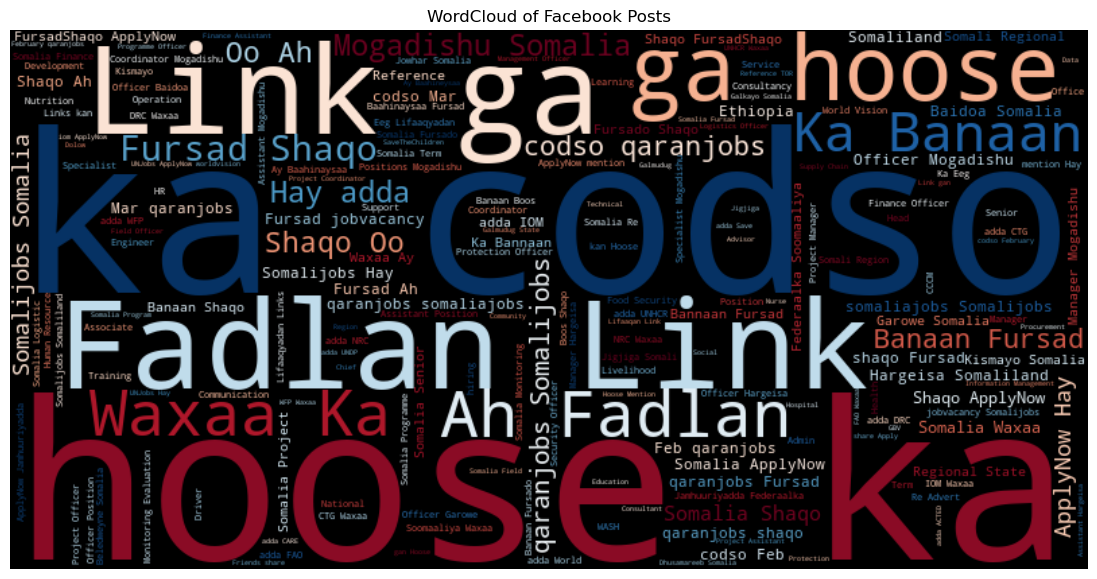

In [48]:
# Concatenate all Facebook posts into a single string
all_posts_text = ' '.join(df_final['Facebook_Post'])

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='RdBu').generate(all_posts_text)

# Plot the WordCloud
plt.figure(figsize=(20, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Facebook Posts')
plt.show()

In [49]:
import pandas as pd
import plotly.express as px


# Function to merge similar locations
def merge_similar_locations(locations):
    merged_locations = []
    for location in locations:
        # Split the location by comma and take the first part
        parts = location.split(',')
        merged_locations.append(parts[0].strip())  # Strip to remove leading/trailing spaces
    return merged_locations

# Apply the function to merge similar locations
df_final['Location'] = merge_similar_locations(df_final['Location'])

# Count the number of job postings in each location
location_counts = df_final['Location'].value_counts().nlargest(10)

# Create a DataFrame from the counts
top_locations_df = pd.DataFrame({'Location': location_counts.index, 'Count': location_counts.values})

# Visualization of the top ten locations
fig = px.bar(
    top_locations_df,
    x='Location',
    y='Count',
    title='Top Ten Locations for Job Postings',
    template='plotly_dark',
    color='Count',  # Color based on the count of job postings
    color_continuous_scale='RdBu'  # Gradient color scale
)

# Update layout for x-axis and y-axis titles, font, and ticks
fig.update_layout(
    xaxis_title="Location",
    yaxis_title="Number of Job Postings",
    font=dict(size=17, family="Franklin Gothic"),
)

# Show the plot
fig.show()


In [50]:
import json
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the GeoJSON data
geojson_path = "countries.json"
with open(geojson_path, "r") as file:
    geojson = json.load(file)

# Your df_final DataFrame with the job postings must be defined before this step

# Function to merge similar locations
def merge_similar_locations(locations):
    merged_locations = []
    for location in locations:
        parts = location.split(',')
        merged_locations.append(parts[0].strip())  # Strip to remove leading/trailing spaces
    return merged_locations

# Apply the function to merge similar locations
df_final['Location'] = merge_similar_locations(df_final['Location'])

# Count the number of job postings in each location and create a DataFrame from the counts
location_counts = df_final['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Count']

# Mapping location names to their corresponding ISO 3166-1 alpha-3 codes
# (This mapping should be defined correctly based on your data)
location_to_iso = {
    'Mogadishu': 'SOM',
    'Somalia': 'SOM',
    'Hargeisa': 'SOMLND',
    'Baidoa': 'SOM',
    'Garowe': 'SOM',
    'Kismayo': 'SOM',
    'Somaliland': 'SOMLND',
    'Jowhar': 'SOM',
    'Jigjiga': 'ETH',
    'Beledweyne': 'SOM',
    'Berbera': 'SOMLND',
    'Dhusamareeb': 'SOM',
    'Burao': 'SOMLND',
    'Dollow': 'SOM',
    'Dadaab': 'KEN',
    'Galkacayo': 'SOM',
    'Gaalkacyo': 'SOM',
    'Galkayo': 'SOM',
    'Jijiga': 'ETH',
    'Bosaso': 'SOM',
    'Dolow': 'SOM',
    'Galmudug State Of Somalia': 'SOM',
    'Dire Dawa': 'ETH',
    'Gedo': 'SOM',
    'Hirshabelle State Of Somalia': 'SOM',
    'Mogadishu Somalia': 'SOM',
    'Dollo Ado': 'SOM',
    'Somali Regional State Of Ethiopia': 'ETH',
    'Nairobi': 'KEN',
    'Bardhere': 'SOM',
    'Djibouti': 'DJI',
    'Hudur': 'SOM',
    'Erigavo': 'SOMLND',
    'Borama': 'SOMLND',
    'Gode': 'ETH',
    'Badhan': 'SOM',
    'Baledogle': 'SOM',
    'Bardale': 'SOM',
    'Burco': 'SOMLND',
    'Melkadida': 'SOM',
    'Puntland State Of Somalia': 'SOM',
    'Mogadishu Banadir Somalia': 'SOM',
    'Xudur': 'SOM',
    'Muqdisho': 'SOM',
    'Puntland': 'SOM',
    'Adado': 'SOM',
    'Somali Region': 'ETH',
    'Hudun': 'SOM',
    'Abudwak': 'SOM',
    'Dhuusamareeb': 'SOM',
    'Wanlawayn': 'SOM',
    'Jubbaland State Of Somalia': 'SOM',
    'Oodweyne': 'SOM',
    'Afgoye': 'SOM',
    'Guriceel': 'SOM',
    'Liben Zone - Filtu': 'ETH',
    'Bay Region': 'SOM',
    'Gabiley': 'SOMLND',
    'Caabudwaaq': 'SOM',
    'Wajid': 'SOM',
    'Erigavo (Ceerigaabo)': 'SOMLND',
    'Wajid & Garowe/Eyl': 'SOM',
    'Dolo Ado/Dolo Bay': 'SOM',
    'Dhusamareb and Galkacyo': 'SOM',
    'Mogadishu/Hargeisa': 'SOM',
    'Hargeisa Somaliland': 'SOMLND',
    'Baidoa and Jowhar': 'SOM',
    'Marka': 'SOM',
    'Dusamareb and Galkayo': 'SOM',
    'Mogadishu & Kismayo': 'SOM',
    'Kismaayo': 'SOM',
    'Mogadishu/Baidoa': 'SOM',
    'Heliwa-Mogadishu': 'SOM',
    'Liben Zone': 'ETH',
    'Sanaag Region': 'SOMLND',
    'Balcad-Hirshabelle': 'SOM',
    'Afdher/Liban': 'ETH',
    'Jowhar/Baidoa': 'SOM',
    'Hirshabelle State of Somalia': 'SOM',
    'Buur Hakaba': 'SOM',
    'Berdale': 'SOM',
    'Sheikh': 'SOMLND',
    'Mogadishu/Garowe': 'SOM',
    'Bosasso': 'SOM',
    'Balcad': 'SOM',
    'Galmudug': 'SOM',
    'Mahaas': 'SOM',
    'Banadir': 'SOM',
    'Bay': 'SOM',
    'Puntland State of Somalia': 'SOM',
    'Galkacyo': 'SOM',
    'Hargelle': 'ETH',
    'Elkare': 'ETH',
    'Luuq': 'SOM',
    'Bulaburde': 'SOM',
    'Adan Yabal': 'SOM',
    'Baidoa/Hudur': 'SOM',
    'Qardho': 'SOM',
    'Mogadishu/Jowhar': 'SOM',
    'Dadaab and Kakuma': 'KEN',
    'Saylac': 'SOMLND',
    'Kebrbeyah': 'ETH',
    'Kismayo – Jubaland State of Somalia': 'SOM',
    'Dobley': 'SOM',
    'Beledhawa': 'SOM',
    'Lascanood': 'SOM',
    'Luuq (Boholgaras)': 'SOM',
    'Mogadisu': 'SOM',
    'Odwayne': 'SOM',
    'Baligubadle': 'SOMLND',
    'Mogadishu and Galkayo': 'SOM',
    'Salaxley': 'SOMLND',
    'Caynaba': 'SOMLND',
    'Somalia / Kenya': 'SOM',
    'Baidoa & Kismayo': 'SOM',
    'Tula-Barwaq': 'SOM',
    'Burtinle': 'SOM',
    'Jarar Zone of Somali Regional State of Ethiopia': 'ETH',
    'Baidoa/BurHakaba': 'SOM',
    'Yaqshid District Baandir Region Somalia': 'SOM',
    'Bosaso-Puntland': 'SOM',
    'Beled Hawa': 'SOM',
    'Qarhis': 'SOM',
    'Dangoroyo': 'SOM',
    'Hargesia': 'SOM',
    'Cadaado': 'SOM',
    'Arabsiyo': 'SOMLND',
    'Ainabo': 'SOMLND',
    'Mahas and Mataban Districts': 'SOM',
    'Awadal Region': 'SOMLND',
    'Bardhere and Luuq - Somalia': 'SOM',
    'Mogadishu and South and Central Somalia': 'SOM',
    'Kebribeyah': 'ETH',
    'jigjiga': 'ETH',
    'Hargeisa and Berbera': 'SOMLND',
    'South and Centeral of Somalia': 'SOM',
    'Remote': 'SOM',
    'Bari Region': 'SOM',
    'Iskushuban Bari Region Puntland': 'SOM',
    'Elwak': 'SOM',
    'Eyl': 'SOM',
    'Qabribayax': 'ETH',
    'Anywhere': 'SOM',
    'Afgoi and Mogadishu': 'SOM',
    'Harar': 'ETH',
    'Somali Regional State of Ethiopia': 'ETH',
    'Ethiopia': 'ETH',
    'Bal’ad and Adale': 'SOM',
    'Saraar': 'SOMLND',
    'Garoowe': 'SOM',
    'Bursaalax': 'SOM',
    'Towfiiq': 'SOM',
    'Moyale': 'SOM',
    'Qardo': 'SOM',
    'Hirshabelle & Galmudug': 'SOM',
    'Home-based': 'SOM',
    'Garbaharey': 'ETH',
    'Baidoa & Burhakaba': 'SOM',
    'Baidoa (Baydhabo)': 'SOM',
    'Burdhubo': 'SOM',
    'Middle Shabelle Region': 'SOM',
    'Jowhar or Baidoa': 'SOM',
    'Hirshabelle': 'SOM',
    'Baidoa/Berdale': 'SOM',
    'Mogadishu and Dollow': 'SOM',
    'Laasanod': 'SOM',
    'Dolo': 'SOM',
    'Ceel Afweyn': 'SOMLND',
    'Mogadishu/Baidao': 'SOM',
    'Dusmareb': 'SOM',
    'Sitti Zone': 'ETH',
    'Hargeisa & Garowe': 'SOM',
    'Wajale': 'SOMLND',
    'Jubaland': 'SOM',
    'Heliwa/Mogadishu': 'SOM',
    'El Wak': 'SOM',
    'Southwest State Of Somalia': 'SOM',
    'South West State of Somalia': 'SOM',
    'Dhoobley': 'SOM',
    'Boosaaso': 'SOM',
    'Afgoye district': 'SOM',
    'Bossaso': 'SOM',
    'Hargelle woreda': 'ETH',
    'Garowe / Galkayo': 'SOM',
    'Garowe or Baidoa': 'SOM',
    'Moqokori': 'SOM',
    'South West/Mogadishu': 'SOM',
    'Qoryoley': 'SOM',
    'Hir-shabelle & Galmudug': 'SOM',
    'Barawe': 'SOM',
    'Dinsoor': 'SOM',
    'Garowe/Kalabaydh': 'SOM',
    'Mahas': 'SOM',
    'Dolow & Beled Hawo': 'SOM',
    'Luuq iyo Belethawo': 'SOM',
    'Hargaisa': 'SOMLND',
    'Kismayo & Baidoa': 'SOM',
    'Dhusamareeb/Galkayo': 'SOM',
    'Hiiraan Region': 'SOM',
    'Jubaland State of Somalia': 'SOM',
    'Dhumasareb': 'SOM',
    'Kismaiyo': 'SOM',
    'Bosaso & Hargaisa': 'SOMLND',
    'Burhakaba and Baidoa': 'SOM',
    'Baidoa & Kismayo - Somalia': 'SOM',
    'Baidoa - Somalia': 'SOM',
    'Mogadishu SomaliaSomalia': 'SOM',
    'Kakuma': 'SOM',
    'Ceelasha Biyaha': 'SOM',
    'Gedo region': 'SOM',
    'Mudug region': 'SOM',
    'Hiran Region': 'SOM',
    'Burhakaba': 'SOM',
    'Burhakaba and Hudur': 'SOM',
    'Daynile District': 'SOM',
    'Kenya/Somalia': '',
    'Kenya and Somalia': '',
    'Dhusmareb': 'SOM',
    'Kabribeya town': 'ETH',
    'Afder Zone': 'ETH',
    'Somali Regional State': 'ETH',
    'Beledweyne and Afgoye': 'SOM',
    'Galmudug State': 'SOM',
    'Dhusamreb': 'SOM',
    'KM4': 'SOM',
    'Jowhar and Balcad': 'SOM',
    'Lascanod': 'SOM'
}


# Add ISO codes to the DataFrame
location_counts['ISO'] = location_counts['Location'].map(location_to_iso)

# Group by ISO and sum the counts to ensure no duplication in visualization
grouped_data = location_counts.groupby('ISO').agg({'Count': 'sum'}).reset_index()

# The rest of the plot code goes here, as previously provided...

# Define the color scale
color_scale = px.colors.sequential.Viridis

# Find min and max values for the color scale
zmin = grouped_data['Count'].min()
zmax = grouped_data['Count'].max()

# Normalize the Count data to match the color scale range [0, 1]
grouped_data['Color'] = (grouped_data['Count'] - zmin) / (zmax - zmin)

# Create subplots: one for a map and one for a bar chart
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "mapbox"}, {"type": "bar"}]],
    subplot_titles=("Job Postings Map", "Job Postings Bar Chart"),
    column_widths=[0.7, 0.3]
)

# Add the choropleth map to the first subplot
fig.add_trace(
    go.Choroplethmapbox(
        geojson=geojson,
        locations=grouped_data['ISO'],
        z=grouped_data['Count'],
        colorscale=color_scale,
        zmin=zmin,
        zmax=zmax,
        marker_opacity=0.7,
        hoverinfo='all'
    ),
    row=1, col=1
)

# Assign a color to each bar based on the normalized count value
bar_colors = [color_scale[int(c * (len(color_scale) - 1))] for c in grouped_data['Color']]

# Add the bar chart to the second subplot
fig.add_trace(
    go.Bar(
        x=grouped_data['Count'],
        y=grouped_data['ISO'],
        orientation='h',
        marker=dict(color=bar_colors)
    ),
    row=1, col=2
)

# Update layout for map
fig.update_layout(
    mapbox=dict(
        style="carto-positron",
        zoom=4.2,
        center={"lat": 5.0, "lon": 41.0}
    ),
    mapbox_style="white-bg",
    showlegend=False
)

# Adjust the layout
fig.update_layout(
    height=600,
    margin={"r": 0, "t": 50, "l": 0, "b": 0},
    title_text="Job Postings Distribution By Country"
)

# Show the figure
fig.show()


In [51]:
df_final.head()

,Title,Company,Location,Posted,Url,Created_time,Facebook_Post,Shares_Count,Reactions_Count,Comments_Count,STEM,MonthYear,month_year,Post Length,Word Count,ex_level,Trend Score
0,Somali jobs: The Federal Republic of Somalia (...,Federal Republic of Somalia,Somalia,2024-03-31,https://qaranjobs.com/job/somali-jobs-the-fede...,2024-03-31 09:02:41+00:00,Jamhuuriyadda Federaalka Soomaaliya Waxaa Ka B...,0.0,28,1,0,2024-03-01,March 2024,336,35,medium,29.0
1,Somali jobs at Save the Children (6 positions),Save the Children,Somalia,2024-03-30,https://qaranjobs.com/job/somali-jobs-at-save-...,2024-03-30 13:08:50+00:00,6 Fursado Shaqo Ah Hay adda Save the Children ...,9.0,161,16,0,2024-03-01,March 2024,190,21,medium,186.0
2,Finance Assistance,Amtel,Somalia,2024-03-20,https://qaranjobs.com/job/finance-assistance-a...,2024-03-23 13:16:28+00:00,2 Fursado Shaqo Ah Shirkadda Isgaarsiinta AMTE...,5.0,59,14,0,2024-03-01,March 2024,356,34,medium,78.0
4,"Financial Management Specialist, Baidoa, Somalia","Southwest State of Somalia, Municipality of Ba...",Baidoa,2024-03-31,https://qaranjobs.com/job/financial-management...,2024-03-31 08:15:21+00:00,Fursad Shaqo Dhamaan Dadwaynaha Ku Nool Deegaa...,3.0,22,3,0,2024-03-01,March 2024,407,47,long,28.0
5,"CHIEF SECURITY OFFICER, Mogadishu, Somalia",United Nations Support Office in Somalia,Mogadishu,2024-03-30,https://qaranjobs.com/job/chief-security-offic...,2024-03-30 12:08:34+00:00,"Fursad Shaqo CHIEF SECURITY OFFICER, Mogadishu...",0.0,0,0,0,2024-03-01,March 2024,136,9,medium,0.0


In [52]:
import pandas as pd
import plotly.express as px

# Assuming df_final is your DataFrame and 'Posted' is the column with dates in the format 'YYYY-MM-DD'
# Convert 'Posted' column to datetime if it's not already.
df_final['Posted'] = pd.to_datetime(df_final['Posted'])

# Extract the day of the month from the 'Posted' date column.
df_final['DayOfMonth'] = df_final['Posted'].dt.day

# Count the number of job postings for each day of the month.
day_counts = df_final['DayOfMonth'].value_counts().reset_index()
day_counts.columns = ['DayOfMonth', 'Count']

# Sort the counts in descending order to have bigger bars shown first.
day_counts = day_counts.sort_values(by='Count', ascending=False)

# Now, create a bar chart with Plotly Express.
fig = px.bar(
    day_counts,  # updated DataFrame
    x='DayOfMonth',  # X-axis shows the day of the month
    y='Count',  # Y-axis shows the counts
    text='Count',  # Show counts as text on each bar
    title='Job Postings by Day of the Month',
    template='plotly_dark',  # Use dark theme for consistency
    color='Count',  # Use count to apply color gradient, simplifying the legend
    color_continuous_scale=px.colors.sequential.PuBuGn  # Use a nice color scale
)

# Update layout and remove unnecessary legend if not useful
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    xaxis_title="Day of the Month",
    yaxis_title="Number of Job Postings",
    font=dict(size=17, family="Franklin Gothic"),
    xaxis=dict(type='category'),  # Treat x-axis values as categories to maintain the order
    showlegend=False  # Optionally disable legend if not needed
)

# Show the plot
fig.show()


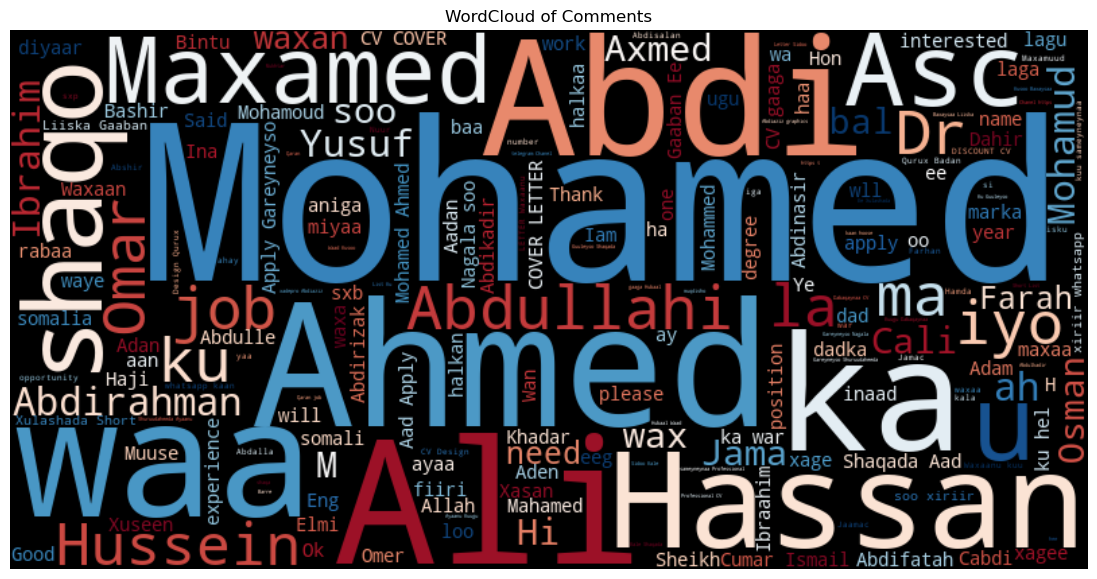

In [55]:
# Handle NaN values and ensure all entries are strings
df_comments['message'] = df_comments['message'].fillna('')  # Replace NaN with empty
# Concatenate all comments into a single string
all_comments_text = ' '.join(df_comments['message'])

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='RdBu').generate(all_comments_text)

# Plot the WordCloud
plt.figure(figsize=(20, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Comments')
plt.show()

In [63]:
import pandas as pd
import plotly.express as px

# Ensure the 'name' column exists in df_reactions before proceeding
if 'name' in df_reactions.columns:
    # Count the number of reactions each user has received and select the top 10
    user_reaction_counts = df_reactions['name'].value_counts().nlargest(5)

    # Prepare a DataFrame for the top 10 most liked users
    top_liked_users = pd.DataFrame({
        'UserName': user_reaction_counts.index,
        'Likes': user_reaction_counts.values
    })

    # Create a bar chart for the top 10 most liked users
    fig = px.bar(
        top_liked_users,
        x='UserName',
        y='Likes',
        title='Top 5 Most Liked Users',
        text='Likes',
        template='plotly_dark',
        color='Likes',  # Use the 'Likes' column to apply color
        color_continuous_scale=px.colors.sequential.PuBuGn  # Use a nice color scale
    )

    # Update layout for a clearer presentation
    fig.update_layout(
        xaxis_title="User Name",
        yaxis_title="Number of Likes",
        font=dict(size=17, family="Arial"),
        xaxis={'type': 'category'}  # Treat UserName as categorical data
    )

    # Show the plot
    fig.show()

else:
    print("The column 'name' does not exist in df_reactions.")

In [62]:
# Ensure the 'type' column exists in df_reactions before proceeding
if 'type' in df_reactions.columns:
    # Count the number of each reaction type
    reaction_counts = df_reactions['type'].value_counts()

    # Create a bar chart for the distribution of reaction types
    fig = px.bar(
        reaction_counts,
        x=reaction_counts.index,
        y=reaction_counts.values,
        title='Distribution of Reaction Types',
        labels={'x': 'Reaction Type', 'y': 'Frequency'},
        template='plotly_dark',
        color=reaction_counts.values,
        color_continuous_scale=px.colors.sequential.PuBuGn  # Aesthetic color scale
    )

    # Update layout for a clearer presentation
    fig.update_layout(
        xaxis_title="Reaction Type",
        yaxis_title="Number of Reactions",
        font=dict(size=14, family="Arial")
    )

    # Show the plot
    fig.show()

else:
    print("The column 'type' does not exist in df_reactions.")